## Máster en Big Data y Data Science

### Metodologías de gestión y diseño de proyectos de big data

#### AP2 - Visualización de los datos

---

En esta libreta se generan los modelos de visualización (gráficos) sobre los datasets 
del escenario para su posterior integración en la herramienta a utilizar. 

---

In [1]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importación de librerías

import pandas as pd
# En esta línea se podría producir un error, se debe instalar plotly
import plotly.express as px
import plotly.graph_objects as go

----

##### Lectura del dataset

In [3]:
df = pd.read_csv("../../../data/final/datos_finales.csv", sep=";")
df.head(5)

,operaciones_ult_12m,gastos_ult_12m,limite_credito_tc,antiguedad_cliente,tasa_interes,ingresos,pct_ingreso,antiguedad_empleado,edad,estado_civil_N,estado_credito_N,importe_solicitado,duracion_credito,situacion_vivienda,objetivo_credito,falta_pago,estado_cliente,genero,nivel_educativo,personas_a_cargo
0,15_a_30,2k_a_4k,3k_a_5k,2y_a_4y,15p_a_20p,50k_a_100k,40_a_60,NaN,menor_25,C,C,35000,3,ALQUILER,PERSONAL,Y,ACTIVO,M,UNIVERSITARIO_COMPLETO,2.0
1,30_a_50,2k_a_4k,mayor_10k,2y_a_4y,7p_a_15p,hasta_20k,hasta_20,5_a_10,menor_25,C,P,1000,2,PROPIA,EDUCACIÓN,N,ACTIVO,M,SECUNDARIO_COMPLETO,3.0
2,15_a_30,2k_a_4k,3k_a_5k,2y_a_4y,15p_a_20p,50k_a_100k,40_a_60,5_a_10,menor_25,C,C,35000,2,ALQUILER,SALUD,N,ACTIVO,M,UNIVERSITARIO_COMPLETO,3.0
3,15_a_30,2k_a_4k,5k_a_10k,mayor_4y,7p_a_15p,50k_a_100k,40_a_60,5_a_10,menor_25,C,C,35000,4,ALQUILER,SALUD,Y,ACTIVO,M,DESCONOCIDO,1.0
4,15_a_30,2k_a_4k,3k_a_5k,2y_a_4y,7p_a_15p,hasta_20k,20_a_40,menor_5,menor_25,N,C,2500,2,PROPIA,INVERSIONES,N,ACTIVO,F,SECUNDARIO_COMPLETO,4.0


----

##### Definición de gráficos de interés

In [4]:
# Cantidad de créditos por objetivo del mismo

creditos_x_objetivo = px.histogram(df, x='objetivo_credito', 
                                   title='Conteo de créditos por objetivo')
creditos_x_objetivo.update_layout(xaxis_title='Objetivo del crédito', yaxis_title='Cantidad')

In [5]:
# Histograma de los importes de créditos otorgados

histograma_importes = px.histogram(df, x='importe_solicitado', nbins=10, title='Importes solicitados en créditos')
histograma_importes.update_layout(xaxis_title='Importe solicitado', yaxis_title='Cantidad')

In [6]:
# Conteo de ocurrencias por estado
estado_credito_counts = df['estado_credito_N'].value_counts()

# Gráfico de torta de estos valores
fig = go.Figure(data=[go.Pie(labels=estado_credito_counts.index, values=estado_credito_counts)])
fig.update_layout(title_text='Distribución de créditos por estado registrado')
fig.show()

In [7]:
# Conteo de ocurrencias por caso
falta_pago_counts = df['falta_pago'].value_counts()

# Create a Pie chart
fig = go.Figure(data=[go.Pie(labels=falta_pago_counts.index, values=falta_pago_counts)])
fig.update_layout(title_text='Distribución de créditos en función de registro de mora')
fig.show()

In [8]:
# Gráfico de barras apiladas: Comparar la distribución de créditos por estado y objetivo
barras_apiladas = px.histogram(df, x='objetivo_credito', color='estado_credito_N', 
                               title='Distribución de créditos por estado y objetivo',
                               barmode='stack')
barras_apiladas.update_layout(xaxis_title='Objetivo del crédito', yaxis_title='Cantidad')
barras_apiladas.show()

In [9]:
# Definir el orden personalizado
orden_antiguedad = ['menor_2y', '2y_a_4y', 'mayor_4y']

# Ordenar los datos según el orden personalizado
df_ordenado = df.groupby('antiguedad_cliente')['importe_solicitado'].mean().reset_index()
df_ordenado['antiguedad_cliente'] = pd.Categorical(df_ordenado['antiguedad_cliente'], categories=orden_antiguedad, ordered=True)
df_ordenado = df_ordenado.sort_values('antiguedad_cliente')

# Crear el gráfico de líneas
lineas_importes_antiguedad = px.line(df_ordenado, x='antiguedad_cliente', y='importe_solicitado',
                                     title='Evolución de los importes solicitados por antigüedad del cliente')
lineas_importes_antiguedad.update_layout(xaxis_title='Antigüedad del cliente', yaxis_title='Importe solicitado promedio')
lineas_importes_antiguedad.show()

In [10]:
# Crear el gráfico de cajas
fig = px.box(
    df,
    x="objetivo_credito",
    y="importe_solicitado",
    title="Distribución de los importes solicitados por objetivo del crédito",
    labels={
        "objetivo_credito": "Objetivo del Crédito",
        "importe_solicitado": "Importe Solicitado"
    },
    color="objetivo_credito"
)

# Mostrar el gráfico
fig.show()

In [11]:
# Crear gráfico de dispersión
fig_scatter = px.scatter(
    df,
    x="duracion_credito",
    y="importe_solicitado",
    color="estado_credito_N",
    title="Relación entre importe solicitado y duración del crédito",
    labels={
        "duracion_credito": "Duración del Crédito (meses)",
        "importe_solicitado": "Importe Solicitado",
        "estado_credito_N": "Estado del Crédito"
    }
)

fig_scatter.show()

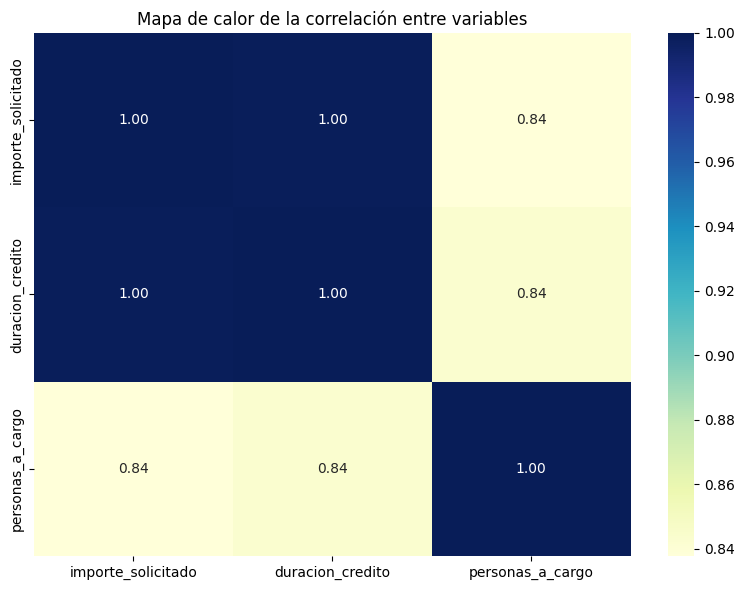

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear DataFrame de ejemplo con las columnas requeridas
data = {
    "importe_solicitado": [5000, 7000, 9000, 11000, 5200, 7200, 9200, 11200, 5100, 7100],
    "duracion_credito": [12, 24, 36, 48, 12, 24, 36, 48, 12, 24],
    "personas_a_cargo": [1, 2, 1, 3, 0, 1, 2, 3, 0, 2]
}
df = pd.DataFrame(data)

# Calcular la matriz de correlación
correlation_matrix = df.corr(numeric_only=True)

# Crear mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Mapa de calor de la correlación entre variables")
plt.tight_layout()
plt.show()


Otros gráficos a implementar:

1. Distribución de los importes solicitados (`importe_solicitado`) por objetivo del crédito (`objetivo_credito`) en un gráfico de cajas.
2. Relación entre el importe solicitado (`importe_solicitado`) con la duración del crédito (`duracion_credito`), coloreado por estado del crédito (`estado_credito_N`) en un gráfico de dispersión.
3. Análisis de la correlación entre variables como `importe_solicitado`, `duracion_credito`, y `personas_a_cargo` en un mapa de calor.

Entre otros...